# Library


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe,model,image_processing,scoring
%reload_ext autoreload

# Dataset

In [3]:
import numpy as np
import cv2

# Let's take a look at our digits dataset
image = cv2.imread(r'E:\gitlab\machine-learning\dataset\images\digits.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
small = cv2.pyrDown(image)

# Split the image to 5000 cells, each 20x20 size
# This gives us a 4-dim array: 50 x 100 x 20 x 20
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Convert the List data type to Numpy Array of shape (50,100,20,20)
x = np.array(cells)
print ("The shape of our cells array: " + str(x.shape))


The shape of our cells array: (50, 100, 20, 20)


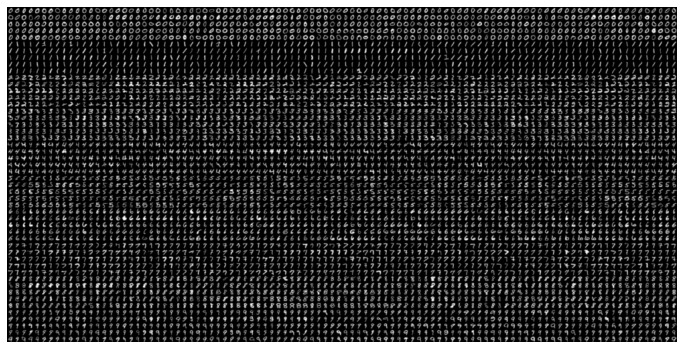

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
axes.imshow(small[:,:,::-1])
axes.axis('off')
plt.show()

# split and labeling

In [5]:
# Split the full data set into two segments
# One will be used fro Training the model, the other as a test data set
train = x[:,:70].reshape(-1,400).astype(np.float32) # Size = (3500,400)
test = x[:,70:100].reshape(-1,400).astype(np.float32) # Size = (1500,400)

# Create labels for train and test data
k = [0,1,2,3,4,5,6,7,8,9]
train_labels = np.repeat(k,350)[:,np.newaxis]
test_labels = np.repeat(k,150)[:,np.newaxis]

In [6]:
print(train.shape)
print(train_labels.shape)
print(test.shape)
print(test_labels.shape)

(3500, 400)
(3500, 1)
(1500, 400)
(1500, 1)


# modeling

In [7]:
list_model = ['random_forest','adaboost',"lr"]

In [8]:
models,names_model,probs_model,pred_model,time_1,time_2 = model.modeling_multiclass(
    train,test,train_labels,test_labels,list_model,types='ovr',detail=False)

we have done with these models:
Random Forest
Adaboost Classifier
Logistic_Regression


,Eval_params,Random Forest Classifier,Adaboost Classifier,LogisticRegression
0,accuracy score,0.9293,0.8773,0.8333
1,balanced accuracy score,0.9293,0.8773,0.8333
2,Logloss,0.4746,2.0499,2.5795
3,precision score,0.9304,0.8781,0.8382
4,recall score,0.9293,0.8773,0.8333
5,fp,"[12.0, 5.0, 8.0, 12.0, 7.0, 3.0, 13.0, 8.0, 17...","[17.0, 7.0, 24.0, 21.0, 8.0, 22.0, 11.0, 17.0,...","[12.0, 8.0, 22.0, 43.0, 15.0, 21.0, 12.0, 20.0..."
6,fn,"[4.0, 0.0, 17.0, 13.0, 16.0, 18.0, 5.0, 8.0, 1...","[6.0, 1.0, 34.0, 30.0, 28.0, 21.0, 17.0, 9.0, ...","[7.0, 7.0, 35.0, 39.0, 26.0, 35.0, 10.0, 23.0,..."
7,tp,"[146.0, 150.0, 133.0, 137.0, 134.0, 132.0, 145...","[144.0, 149.0, 116.0, 120.0, 122.0, 129.0, 133...","[143.0, 143.0, 115.0, 111.0, 124.0, 115.0, 140..."
8,tn,"[1338.0, 1345.0, 1342.0, 1338.0, 1343.0, 1347....","[1333.0, 1343.0, 1326.0, 1329.0, 1342.0, 1328....","[1338.0, 1342.0, 1328.0, 1307.0, 1335.0, 1329...."
9,F1 score,0.9292,0.8767,0.8344


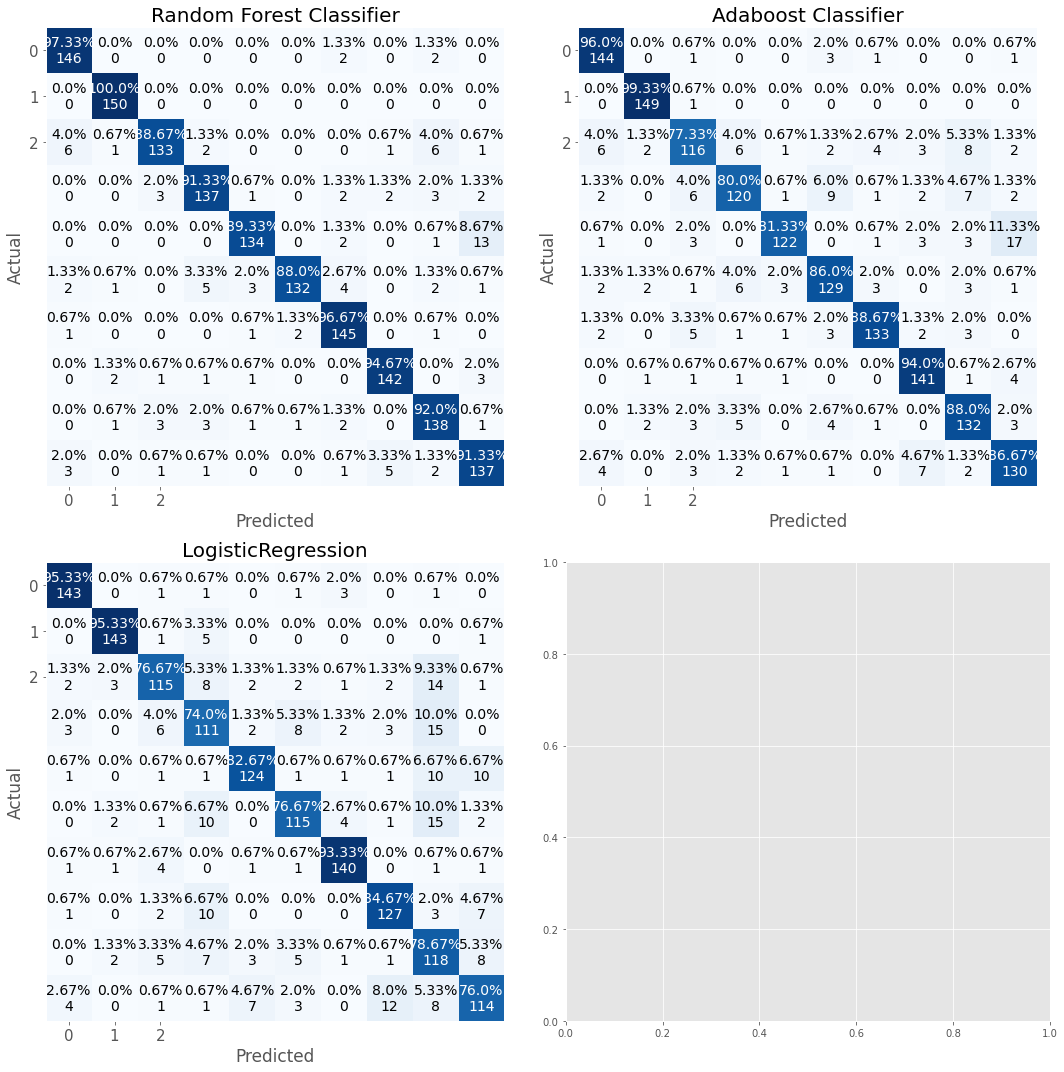

In [9]:
result = scoring.print_score_multiclass_detail(test_labels,pred_model,probs_model,names_model=names_model,
                                      mc='ovr',labels=[0,1,2],time1=time_1,time2=time_2,fig=[2,2])

# predicting image

In [10]:
models[0]

OneVsRestClassifier(estimator=RandomForestClassifier(), n_jobs=-1)

The number is: 13540


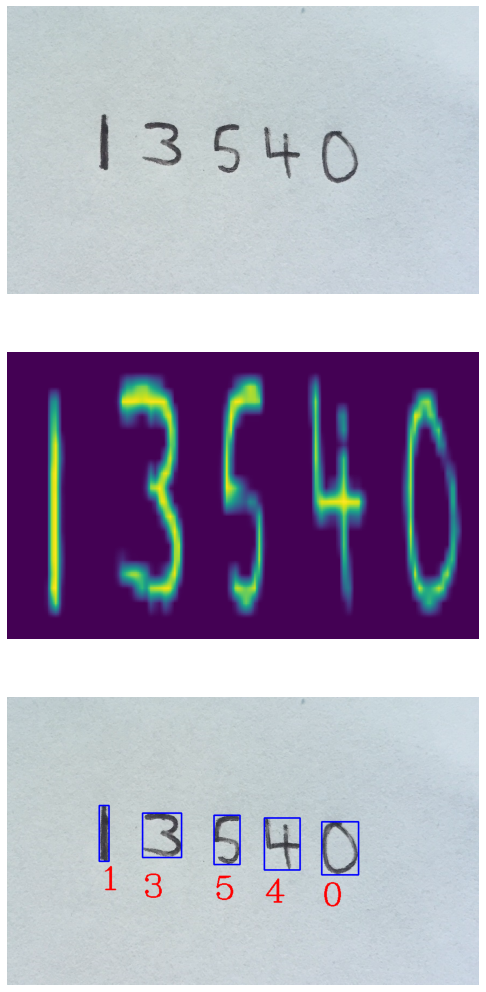

In [43]:
res = image_processing.detecting_numbers(image_data=r'E:\gitlab\machine-learning\dataset\images\numbers.jpg'
                                   ,model=models[0])